### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import csv
from collections import defaultdict
import math
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

#import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10
    

# Data Exploration

In [2]:
input_file1 = "dataset/train.csv"
input_file2 = "dataset/validation.csv"
input_file3 = "dataset/test.csv"

## comma delimited is the default, set data type to unicode
train_df = pd.read_csv(input_file1, dtype="unicode")
val_df = pd.read_csv(input_file2, dtype="unicode")
test_df = pd.read_csv(input_file3, dtype="unicode")

train_df.head(5)


,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [3]:
train_df.describe()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
count,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,...,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738,2697738
unique,2,7,24,2697738,1,2591064,39,515530,35,370,...,14,11,4,284,130,8,301,19,9,814364
top,0,0,0,c2f2e5463ff8398d25989cd9d36f5502,1,u_Z0TpZkKyPHdUQmL,windows_ie,113.106.102.*,216,219,...,90,0,0,0,44966cc8da1ed40c95d59e863c8c75f0,300,70,null,1458,null
freq,2695704,465241,202239,1,2697738,13,1619634,3731,451642,120875,...,1260243,1116187,1464916,867735,162572,1038847,155575,553300,540293,553251


In [4]:
#num of impressions in train dataset
impressionsTr = train_df['click'].count()
impressionsTr

2697738

In [5]:
#num of impressions in validation dataset
impressionsVal=val_df['click'].count()
impressionsVal

299749

In [6]:
#num of impressions in testing dataset
impressionsT=test_df['bidid'].count()
impressionsT

299749

In [8]:
count=0
total_spend=0
for index, row in train_df.iterrows():
    click = row['click']
    total_spend+=int(row['payprice'])
    if int(click)==1:
        count+=1

print(count)

2034


In [9]:
countv = 0
for index, row in val_df.iterrows():
    click = row['click']
    if int(click)==1:
        countv+=1

print(countv)

226


In [10]:
#CTR for training dataset
CTR = (count/impressionsTr)*100
CTR

0.075396498844587587

In [11]:
#CTR for validation dataset
CTRV = (countv/impressionsVal)*100
CTRV

0.075396415000550457

In [12]:
#eCPM for training dataset
total_spend=0
for index, row in train_df.iterrows():
    total_spend+=int(row['payprice'])
eCPM = (total_spend/impressionsTr)*1000
eCPM

80251.024747399482

In [13]:
#eCPM for validation dataset
total_spendval=0
for index, row in val_df.iterrows():
    total_spendval+=int(row['payprice'])
eCPM_Val = (total_spendval/impressionsVal)*1000
eCPM_Val

80217.842261358674

In [14]:
#avgCPC
total_spend=0
for index, row in train_df.iterrows():
    total_spend+=int(row['payprice'])
avg_total_spend = total_spend/impressionsTr
avgCPC = avg_total_spend/count
avgCPC

0.039454781095083324

In [15]:
#avgCPC for validation set
total_spend_val=0
for index, row in val_df.iterrows():
    total_spend_val+=int(row['payprice'])
avg_total_spend_val = total_spend_val/impressionsVal
avgCPC_val = avg_total_spend_val/countv
avgCPC_val

0.3549462046962773

In [16]:
#total spend for train
total_spend=0
for index, row in train_df.iterrows():
    total_spend+=int(row['payprice'])
total_spend

216496239

In [17]:
#total spend for validation
total_spend_val=0
for index, row in val_df.iterrows():
    total_spend_val+=int(row['payprice'])
total_spend_val

24045218

In [18]:
#CR calculation training
conversion=0
for index, row in train_df.iterrows():
    if int(row['logtype'])==3:
        conversion+=1
CR=conversion/count
CR

0.0

In [19]:
#CR calculation validation
conversion_val=0
for index, row in val_df.iterrows():
    if int(row['logtype'])==3:
        conversion_val+=1
CR_val=conversion_val/countv
CR_val

0.0

In [20]:
#CR calculation training
total_won=0
total_lost=0
for index, row in train_df.iterrows():
    if int(row['click'])==1:
        total_won+=1
    else:
        total_lost+=1
conversion = count / (total_won + total_lost)
conversion

0.0007539649884458758

In [21]:
#CR calculation validation
total_won_val=0
total_lost_val=0
for index, row in val_df.iterrows():
    if int(row['click'])==1:
        total_won_val+=1
    else:
        total_lost_val+=1
conversion_val = countv / (total_won_val + total_lost_val)
conversion_val

0.0007539641500055046

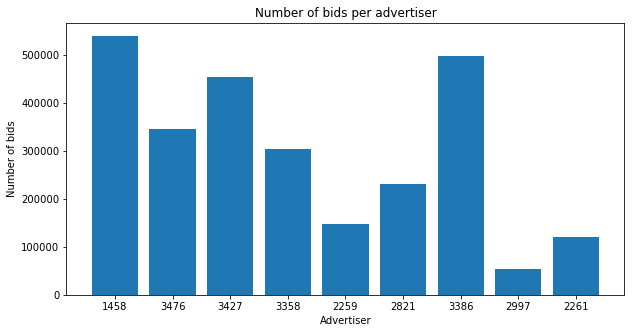

In [22]:
d = dict()
for index, row in train_df.iterrows():
    key = row['advertiser']
    if key in d:
        d[key] += 1
    else:
        d[key] = 1
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
ax.set_ylabel('Number of bids')
ax.set_xlabel('Advertiser')
ax.set_title('Number of bids per advertiser')
plt.show()


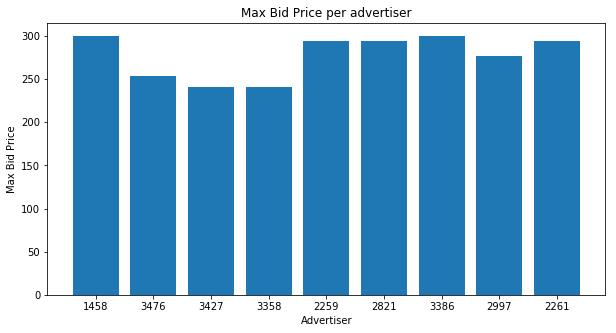

In [23]:
d = dict()
for index, row in train_df.iterrows():
    key = row['advertiser']
    maxBidPrice = int (row['bidprice'])
    if (key in d and d[key]<maxBidPrice):
        d[key] = maxBidPrice
    elif key not in d:
        d[key] = maxBidPrice
        
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys())
ax.set_ylabel('Max Bid Price')
ax.set_xlabel('Advertiser')
ax.set_title('Max Bid Price per advertiser')
plt.show()
   

In [24]:
ls = train_df.groupby('advertiser')

In [25]:
print(ls['click'].count())

advertiser
1458    540293
2259    146778
2261    120619
2821    231416
2997     54487
3358    304782
3386    498554
3427    454031
3476    346778
Name: click, dtype: int64


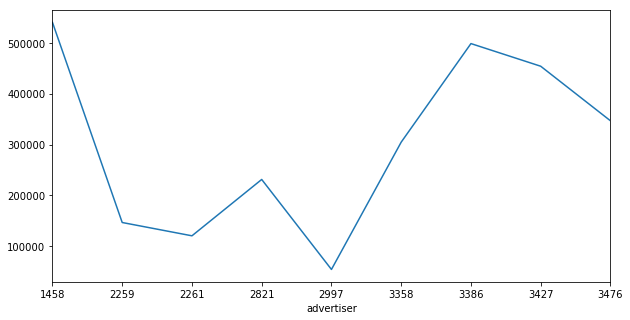

In [26]:
ls['click'].count().plot()

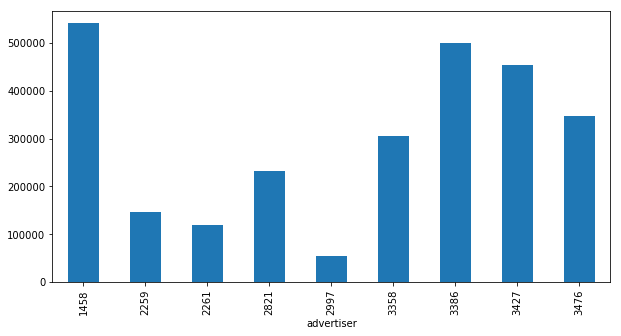

In [27]:
ls['click'].count().plot(x='advertiser',y='number of clicks',kind='bar')

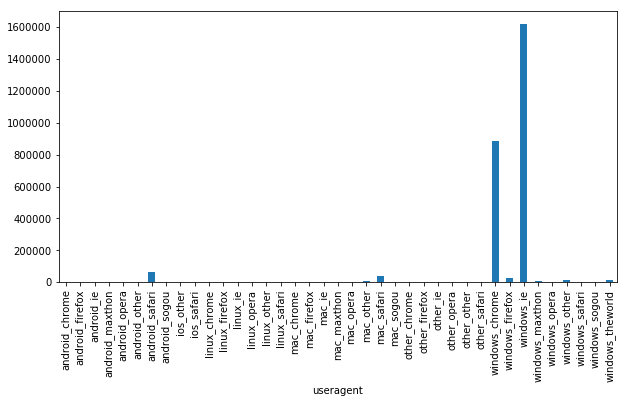

In [28]:
ls = train_df.groupby('useragent')
ls['click'].count().plot(x='useragent',y='number of clicks',kind='bar')

In [29]:
crossbar = pd.crosstab(train_df['useragent'], train_df['bidprice'])
crossbar

bidprice,227,238,241,249,254,277,294,300
useragent,,,,,,,,
android_chrome,162,6,2,0,1,119,101,119
android_firefox,7,0,0,0,0,0,3,8
android_ie,3,0,0,0,0,2,0,3
android_maxthon,8,1,0,0,1,9,6,10
android_opera,235,8,0,0,3,0,85,173
android_other,388,9,2,0,10,933,199,415
android_safari,6125,274,45,0,68,53338,2497,5381
android_sogou,1,0,0,0,0,7,6,1
ios_other,5,0,2,0,0,0,19,5


In [30]:
# Get the unique values of Bid Price
price_locs = sorted(train_df['bidprice'].unique())

price_locs_mapping = dict(zip(price_locs, 
                                 range(0, len(price_locs) + 1)))
price_locs_mapping

{'227': 0,
 '238': 1,
 '241': 2,
 '249': 3,
 '254': 4,
 '277': 5,
 '294': 6,
 '300': 7}

In [31]:
train_df['bidpricenum'] = train_df['bidprice'] \
                               .map(price_locs_mapping) \
                               .astype(int)
train_df.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bidpricenum
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063",7
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111",3
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063,7
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111",1
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005...",1


# FEATURE ENGINEERING

In [32]:
# drop duplicates from all datasets
train_df.drop_duplicates()
val_df.drop_duplicates()
test_df.drop_duplicates()

,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,17,fe2e06dff1dfd227471fd1ca717888ac,1,u_VhkRLiMQL6dVJBn,windows_chrome,117.82.151.*,80,85,1,...,mm_10032134_3463115_11268126,300,250,1,1,0,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,null
1,5,22,92ea762b7b2cfd7aee30a2e88e1f5899,1,u_Vh12CnqyP9NOQhl,windows_chrome,123.126.88.*,1,1,3,...,News_F_Width1,1000,90,0,0,80,832b91d59d0cb5731431653204a76c0e,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10083,10110"
2,2,13,617dfab714eedf4988c4aa9ad5425eca,1,u_Vh1AOk5iPt5Vebb,windows_chrome,120.14.46.*,3,8,3,...,Ent_F_bottom_Width,1000,90,0,0,20,c46090c887c257b61ab1fa11baee91d8,0f951a030abdaedd733ee8d114ce2944,3427,"10063,10006,10111"
3,4,17,7fa016aaa3db39413b482f757facc3f4,1,u_Z0p2LRsmLqsNQIl,windows_ie,123.246.112.*,40,46,1,...,mm_10024662_3445902_11178345,336,280,2,1,0,ff5123fb9333ca095034c62fdaaf51aa,361e128affece850342293213691a043,3386,"10006,13776,10110"
4,6,20,49db062ac10d19591dc7d988d730aad5,1,u_Vhk0Vwm0Olu_kGz,windows_ie,123.134.53.*,146,151,3,...,News_F_bottom_Width,1000,90,0,0,31,0cd33fcb336655841d3e1441b915748d,c8758e8658b05bc3a88af7b37bdf0575,3476,"13403,10052,10075,10063,10006,10083,10031,10110"
5,1,9,6d86a43fbda12fc89c98620f4d8aedc1,1,u_D8KBAC5wz6x,windows_chrome,27.14.200.*,275,275,3,...,News_F_Rectangle,300,250,Na,Na,80,10722,null,2821,"10684,14273,10006,10110,10131,10052,10063"
6,1,22,3b6b3f3227d42ad74971be4b9a26c189,1,u_VhT_1udeOQj9wGE,windows_chrome,183.39.8.*,216,219,2,...,3718883965,160,600,2,0,5,62f7f9a6dca2f80cc00f17dcda730bc1,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10057"
7,6,7,2cc65c3a9f97620d33d4c3ddfb368869,1,u_D9C03UFKzP1,windows_chrome,112.90.222.*,216,233,2,...,3195670606,728,90,OtherView,Na,52,7330,null,2259,"10057,10076,10083,10129,10024,13776,10120,1014..."
8,5,20,be487ced968062be378892fc87013ff9,1,u_Vh5zOkTHD4z4jdz,windows_ie,111.149.211.*,1,1,1,...,mm_29204191_2561511_9883463,728,90,0,1,0,48f2e9ba15708c0146bda5e1dd653caa,bebefa5efe83beee17a3d245e7c5085b,1458,10006
9,3,17,7f7a7e763db7ec8123ddeb8a8c90689f,1,u_VhkEP5m1P81UkVE,windows_ie,124.130.174.*,146,155,2,...,897823254,728,90,2,0,5,7184c9560e68e977187e67e45a4f3198,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10024,10059,13800,10063,10111"


In [33]:
#check for wrong bidprice and pay price
train_df = train_df.drop(train_df[train_df['bidprice'] > train_df['payprice']].index)
val_df = val_df.drop(val_df[val_df['bidprice'] > val_df['payprice']].index)
train_df.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bidpricenum
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063",7
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111",3
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063,7
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005...",1
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063,0


In [102]:
input_file1 = "dataset/train.csv"
input_file2 = "dataset/validation.csv"
input_file3 = "dataset/test.csv"

## comma delimited is the default, set data type to unicode
train_df = pd.read_csv(input_file1, dtype="unicode")
val_df = pd.read_csv(input_file2, dtype="unicode")
test_df = pd.read_csv(input_file3, dtype="unicode")

In [103]:
#change categorical variables to numeric ones
# Vectorize the categorical columns: useragent
train_df_clean=train_df.drop(['bidid','logtype', 'userid','IP','adexchange','url', 'urlid','slotid','slotvisibility','slotformat', 'keypage', 'usertag'],axis=1)
train_df_clean.head()
train_df_onehot = pd.get_dummies(data=train_df_clean, columns = ['useragent','region','city'] )
train_df_onehot.head()
train_df_onehot.to_csv('dataset/train_hot.csv', sep='\t', encoding='utf-8')

In [107]:
len(train_df_onehot.columns)

455

In [108]:
len(train_df_clean.columns)

14

In [109]:
train_df_clean.columns.values 

array(['click', 'weekday', 'hour', 'useragent', 'region', 'city', 'domain',
       'slotwidth', 'slotheight', 'slotprice', 'creative', 'bidprice',
       'payprice', 'advertiser'], dtype=object)

In [112]:
#change categorical variables to numeric ones
val_df_clean=val_df.drop(['bidid','logtype', 'userid','IP','adexchange','url', 'urlid','slotid','slotvisibility','slotformat', 'keypage', 'usertag'],axis=1)
#val_df_clean.head()
val_df_onehot = pd.get_dummies(data=val_df_clean, columns = ['useragent','region','city'] )
val_df_onehot.head()
val_df_onehot.to_csv('dataset/val_hot.csv', sep='\t', encoding='utf-8')

In [113]:
len(val_df_onehot.columns)

452

In [114]:
len(val_df_clean.columns)

14

In [100]:
val_df_clean.columns.values 

array(['click', 'weekday', 'hour', 'useragent', 'region', 'city', 'domain',
       'slotwidth', 'slotheight', 'slotprice', 'creative', 'bidprice',
       'payprice', 'advertiser'], dtype=object)

In [43]:
#change categorical variables to numeric ones
test_df_clean=val_df.drop(['bidid','logtype', 'userid','IP','adexchange','url', 'urlid','slotid','slotvisibility','slotformat', 'keypage', 'usertag'],axis=1)
#test_df_clean.head()
test_df_onehot = pd.get_dummies(data=test_df_clean, columns = ['useragent','region','city'] )
test_df_onehot.head()
test_df_onehot.to_csv('dataset/test_hot.csv', sep='\t', encoding='utf-8')

In [45]:
import numpy as np
import pandas as pd
import random
import csv
from collections import defaultdict
import math
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

#import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10
import csv
import random
import numpy as np
import pandas as pd
from sklearn import linear_model, tree, lda, naive_bayes
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [46]:
input_file1 = "dataset/train.csv"

## comma delimited is the default, set data type to unicode
train_df = pd.read_csv(input_file1, dtype="unicode",nrows=1000)

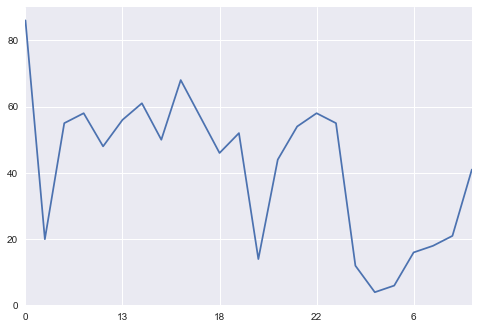

In [47]:
events_per_hour = train_df['hour'].value_counts()
events_per_hour = events_per_hour.sort_index()
events_per_hour.plot()
plt.show()

In [48]:
def histogram(feature):
    
        vc = train_df[feature].value_counts()
        freq = vc.values

        plt.hist(freq)
        
plt.show()
        #plt.clf()

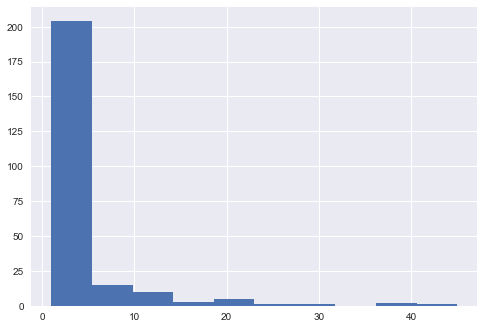

In [49]:
histogram('city')

In [50]:
def piechart(feature):
    
        vc = train_df[feature].value_counts()
        vc = vc.sort_index()

        labels = vc.index.values
        fracs = vc.values
        plt.pie(fracs, labels=labels, autopct='%1.1f%%')
        #plt.savefig(CHARTS_DIR_PATH + ('de_%s-pie.png' % feature))
        plt.show()

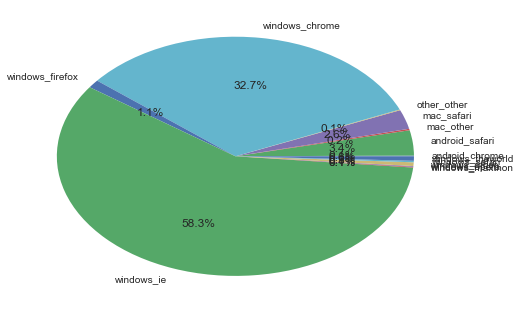

In [51]:
piechart('useragent')

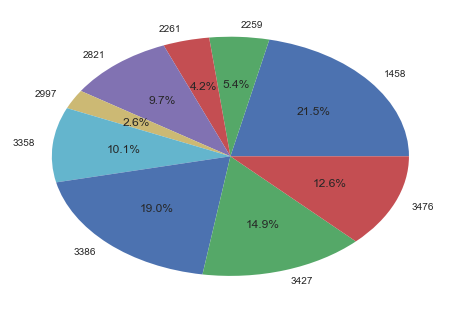

In [52]:
piechart('advertiser')

In [53]:
num_regions = len(train_df['region'].unique())
num_cities = len(train_df['city'].unique())
print ('Number of unique regions: %s' % str(num_regions))
print ('Number of unique cities: %s' % str(num_cities))

Number of unique regions: 35
Number of unique cities: 242


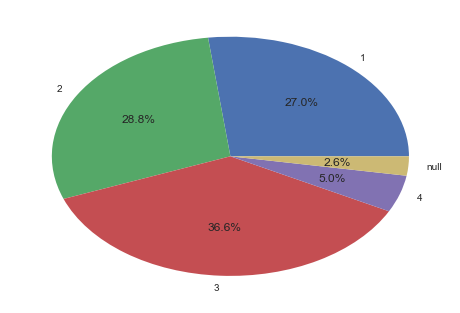

In [54]:
piechart('adexchange')

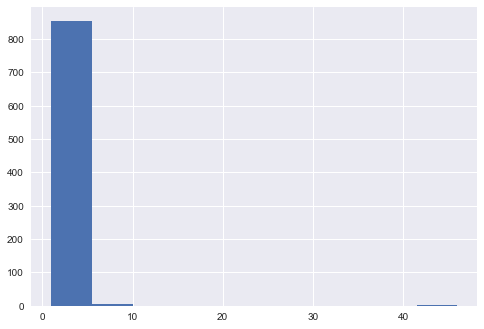

In [55]:
histogram('url')

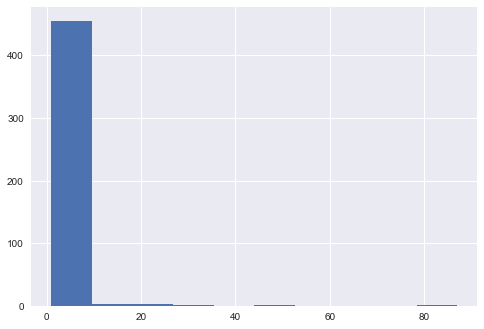

In [56]:
histogram('slotid')

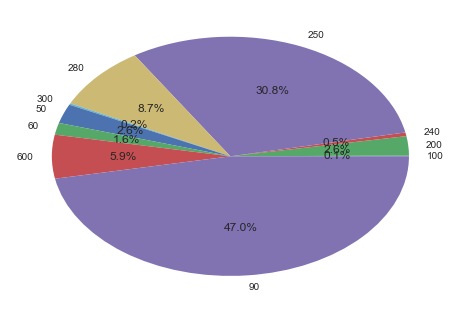

In [57]:
piechart('slotheight')

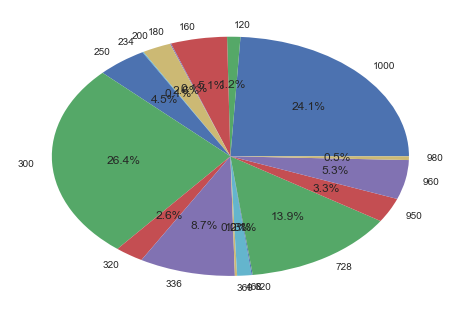

In [58]:
piechart('slotwidth')

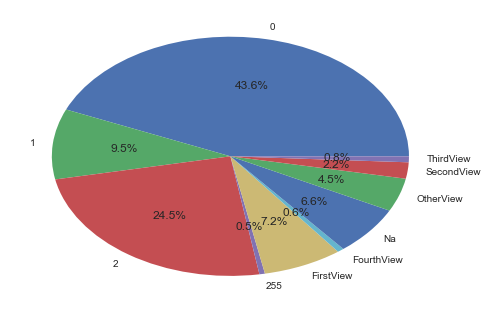

In [59]:
piechart('slotvisibility')

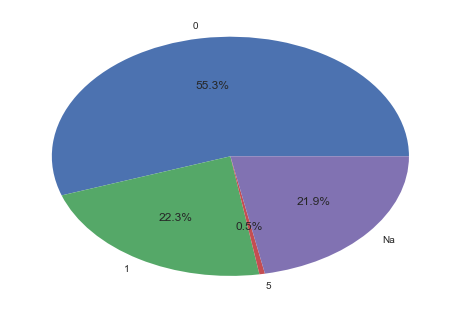

In [60]:
piechart('slotformat')

# Bidding Strategies

In [87]:
def simulate_constant_bid(bid=300, print_output=True):
    input_file4 = "dataset/train_hot.csv"
        # create df with all impressions
    df = pd.read_csv(input_file4, dtype="unicode",delimiter='\t', nrows=10000)
    

        # keep running total of ad spend, impressions, clicks
    ad_spend = 0
    impressions = 0
    clicks = 0

        # for each impression in the log
    for index, value in df.iterrows():
            # grab the attributes of the impression (drop clicks)
        attributes = value

            # calculate the impression utility
        imp_utility = bid

            # calculate the minimum utility needed
        min_utility = 0
        adjusted_utility = imp_utility - min_utility

            # calculate the bid price
        bid_price = adjusted_utility

            # find the paying price
        paying_price = int(value['payprice'])

            # if bid_price > paying_price, update campaign metrics
        if bid_price >= paying_price:
            impressions += 1
            ad_spend += paying_price/1000.0
            if value['click'] == 1:
                clicks += 1

    try:
        cpm = float(ad_spend) / (impressions) * 1000
        ctr = float(clicks) / impressions
    except ZeroDivisionError:
        cpm = 0.0
        ctr = 0.0
    try:
        cpc = float(ad_spend) / clicks
    except ZeroDivisionError:
        cpc = 0.0

    if print_output == False:
        return ad_spend, impressions, clicks, cpm, ctr, cpc
    else:
        
        print ('Total ad spend: %.2f Fen' % ad_spend)
        print ('Number of impressions delivered: %d' % impressions)
        print ('Number of clicks: %d' % clicks)
        print ('eCPM: %.2f Fen' % cpm)
        print ('CTR: %0.2f %%' % (ctr*100))
        print ('CPC: %.2f Fen' % cpc)


In [88]:
simulate_constant_bid(300)

Total ad spend: 623.61 Fen
Number of impressions delivered: 10000
Number of clicks: 0
eCPM: 62.36 Fen
CTR: 0.00 %
CPC: 0.00 Fen


In [91]:
def simulate_random_bid(bid, print_output=True):
    input_file4 = "dataset/train_hot.csv"
        # create df with all impressions
    df = pd.read_csv(input_file4, dtype="unicode",delimiter='\t', nrows=10000)
    
    # keep running total of ad spend, impressions, clicks
    ad_spend = 0
    impressions = 0
    clicks = 0

    # for each impression in the log
    for index, value in df.iterrows():
        # grab the attributes of the impression (drop clicks)
        attributes = value

        # calculate the impression utility
        imp_utility = bid

            # calculate the minimum utility needed
        min_utility = 0
        adjusted_utility = imp_utility - min_utility

            # calculate the bid price
        bid_price = adjusted_utility

            # find the paying price
        paying_price = int(value['payprice'])

        # if bid_price > paying_price, update campaign metrics
        if bid_price >= paying_price:
            impressions += 1
            ad_spend += paying_price/1000.0
            if value['click'] == 1:
                clicks += 1

    try:
        cpm = float(ad_spend) / (impressions) * 1000
        ctr = float(clicks) / impressions
    except ZeroDivisionError:
        cpm = 0.0
        ctr = 0.0
    try:
        cpc = float(ad_spend) / clicks
    except ZeroDivisionError:
        cpc = 0.0

    if print_output == False:
        return ad_spend, impressions, clicks, cpm, ctr, cpc
    else:
        
        print ('Bid Price: %d ' % bid)
        print ('Total ad spend: %.2f Fen' % ad_spend)
        print ('Number of impressions delivered: %d' % impressions)
        print ('Number of clicks: %d' % clicks)
        print ('eCPM: %.2f Fen' % cpm)
        print ('CTR: %0.2f %%' % (ctr*100))
        print ('CPC: %.2f Fen' % cpc)


In [92]:
a=np.random.uniform(0, 300, size=1)
print(a)
simulate_random_bid(a)

[ 82.46249459]
Bid Price: 82 
Total ad spend: 453.16 Fen
Number of impressions delivered: 8487
Number of clicks: 0
eCPM: 53.39 Fen
CTR: 0.00 %
CPC: 0.00 Fen


In [93]:
def simulate_linear_bid(bid, print_output=True):
    input_file4 = "dataset/train_hot.csv"
        # create df with all impressions
    df = pd.read_csv(input_file4, dtype="unicode",delimiter='\t', nrows=10000)
    
    # keep running total of ad spend, impressions, clicks
    ad_spend = 0
    impressions = 0
    clicks = 0

    # for each impression in the log
    for index, value in df.iterrows():
        # grab the attributes of the impression (drop clicks)
        attributes = value

        # calculate the impression utility
        #linear bidding base bid × pCTR/avgCTR
        pCTR = 80.251
        avgCTR = 0.0008
        imp_utility = bid * (pCTR/avgCTR)

            # calculate the minimum utility needed
        min_utility = 0
        adjusted_utility = imp_utility - min_utility

            # calculate the bid price
        bid_price = adjusted_utility

            # find the paying price
        paying_price = int(value['payprice'])

        # if bid_price > paying_price, update campaign metrics
        if bid_price >= paying_price:
            impressions += 1
            ad_spend += paying_price/1000.0
            if value['click'] == 1:
                clicks += 1

    try:
        cpm = float(ad_spend) / (impressions) * 1000
        ctr = float(clicks) / impressions
    except ZeroDivisionError:
        cpm = 0.0
        ctr = 0.0
    try:
        cpc = float(ad_spend) / clicks
    except ZeroDivisionError:
        cpc = 0.0

    if print_output == False:
        return ad_spend, impressions, clicks, cpm, ctr, cpc
    else:
        
        print ('Bid Price: %d ' % bid)
        print ('Total ad spend: %.2f Fen' % ad_spend)
        print ('Number of impressions delivered: %d' % impressions)
        print ('Number of clicks: %d' % clicks)
        print ('eCPM: %.2f Fen' % cpm)
        print ('CTR: %0.2f %%' % (ctr*100))
        print ('CPC: %.2f Fen' % cpc)

In [94]:
a=np.random.uniform(0, 300, size=1)
print(a)
simulate_linear_bid(a)

[ 220.15827344]
Bid Price: 220 
Total ad spend: 623.61 Fen
Number of impressions delivered: 10000
Number of clicks: 0
eCPM: 62.36 Fen
CTR: 0.00 %
CPC: 0.00 Fen
